In [1]:
from Regression import Regression
from Franke import Franke, FrankeNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams["figure.figsize"] = [6.0, 6.0]
mpl.rcParams["font.size"] = 14

np.random.seed(1942)

In [2]:
x, y = np.linspace(0, 1, 201), np.linspace(0, 1, 201)
reg = Regression()
reg.generate_generic_data(x, y, FrankeNoise)

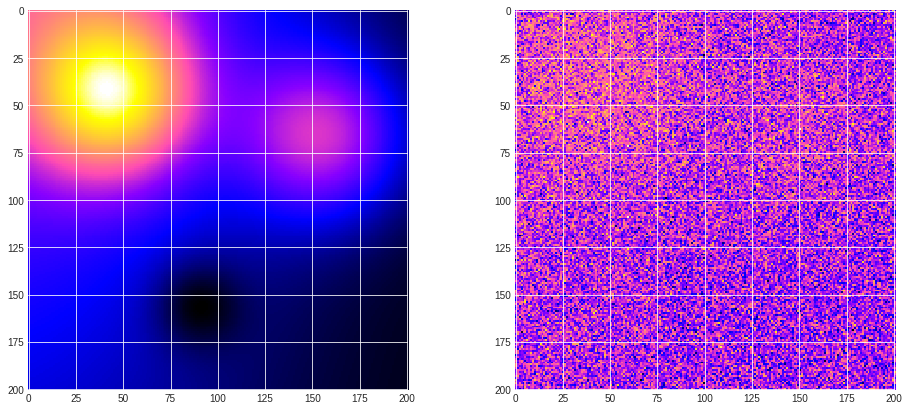

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
franke_noiseless = Franke(reg.x_mesh, reg.y_mesh)
ax1.imshow(franke_noiseless);
ax2.imshow(reg.f);

In [4]:
data_pred = reg.solveKFold(K=10, poly_order=5, solver="Ridge")

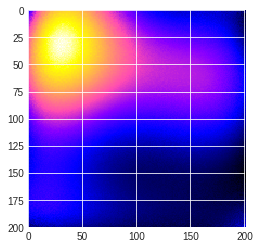

In [5]:
plt.imshow(data_pred);

100%|██████████| 20/20 [00:52<00:00,  4.85s/it]


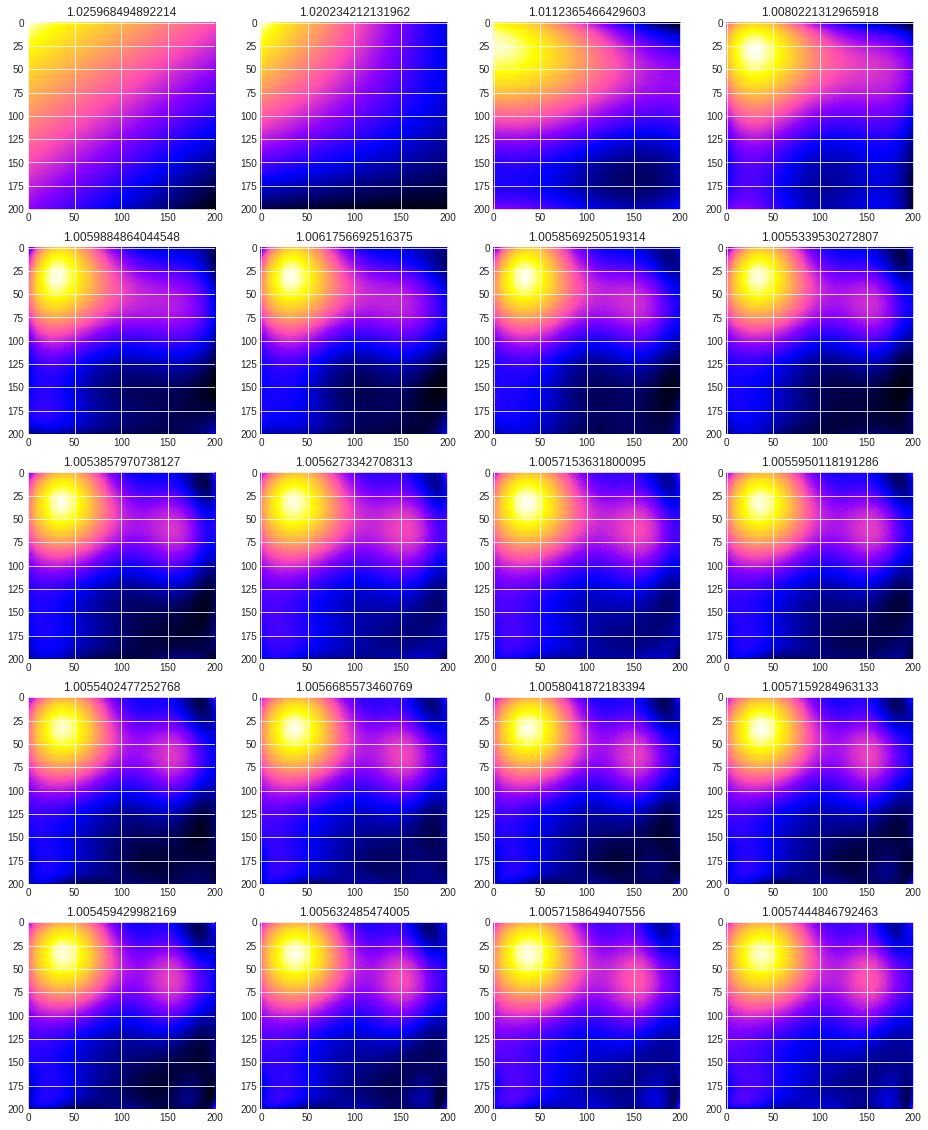

In [6]:
err_list = []
err_list_truemodel = []
nr_poly_orders = 20
poly_orders = np.arange(1, nr_poly_orders + 1)

fig, ax = plt.subplots(nr_poly_orders//4, 4, figsize=(16, 4*nr_poly_orders//4))

for i in trange(len(poly_orders)):
    poly_order = poly_orders[i]
    data_pred = reg.solveKFold(K=10, poly_order=poly_order, solver="Ridge", lamda=1e-4)
    ax[i//4, i%4].imshow(data_pred)
    ax[i//4, i%4].set_title(MSE(data_pred, reg.f))
    err_list.append(MSE(reg.f, data_pred))
    err_list_truemodel.append(MSE(Franke(reg.x_mesh, reg.y_mesh), data_pred))    

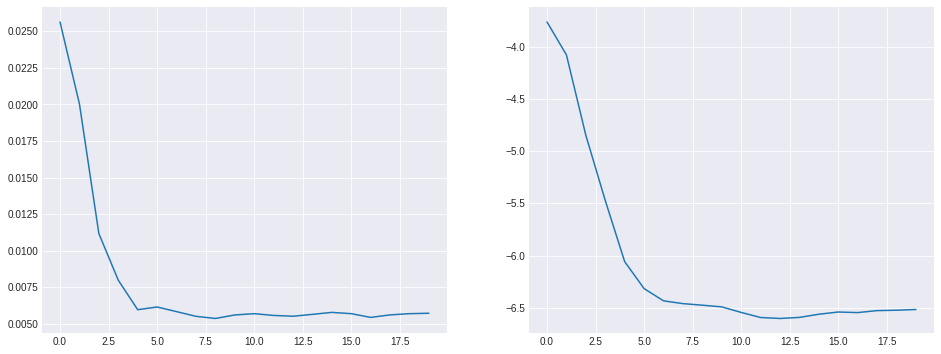

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(np.log(err_list));
ax2.plot(np.log(err_list_truemodel));

In [8]:
mse_list = []
mse_list_noiseless = []
r2_list = []
r2_list_noiseless = []
lamda_list = np.logspace(-1, -8, 16)
for i in trange(len(lamda_list)):
    lamda = lamda_list[i]
    data_pred = reg.solveKFold(K=10, poly_order=5, solver="Ridge", lamda=lamda)
    mse_list.append(MSE(reg.f, data_pred))
    mse_list_noiseless.append(MSE(franke_noiseless, data_pred))
    r2_list.append(r2_score(reg.f, data_pred))
    r2_list_noiseless.append(r2_score(franke_noiseless, data_pred))

100%|██████████| 16/16 [00:05<00:00,  3.11it/s]


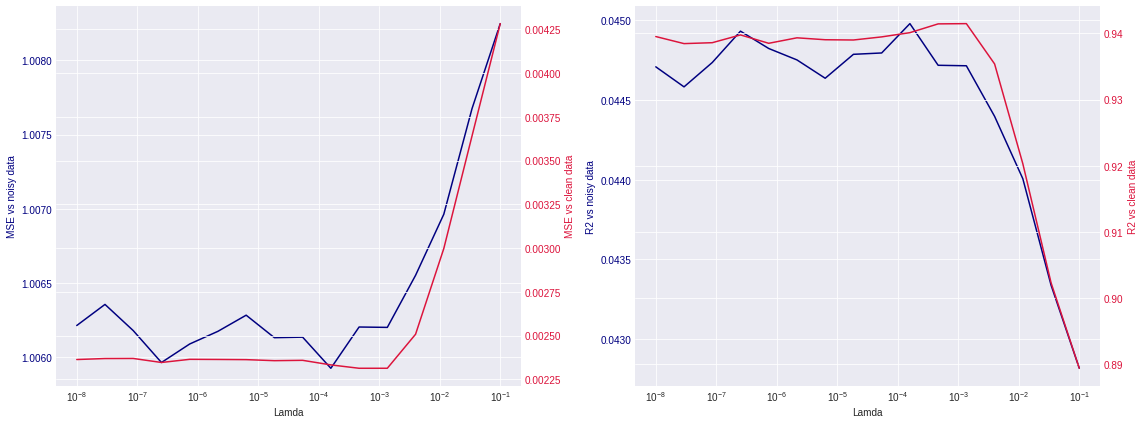

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax11 = ax1.twinx(); ax22 = ax2.twinx()
ax1.semilogx(lamda_list, mse_list, c="navy", label="MSE vs noisy data");
ax11.semilogx(lamda_list, mse_list_noiseless, c="crimson", label="MSE vs clean data");
ax2.semilogx(lamda_list, r2_list, c="navy");
ax22.semilogx(lamda_list, r2_list_noiseless, c="crimson");
ax1.set_xlabel("Lamda")
ax1.set_ylabel("MSE vs noisy data", color="navy");
ax11.set_ylabel("MSE vs clean data", color="crimson");
ax1.tick_params(axis='y', labelcolor="navy")
ax11.tick_params(axis='y', labelcolor="crimson")
ax2.set_xlabel("Lamda")
ax2.set_ylabel("R2 vs noisy data", color="navy");
ax22.set_ylabel("R2 vs clean data", color="crimson");
ax2.tick_params(axis='y', labelcolor="navy")
ax22.tick_params(axis='y', labelcolor="crimson")
fig.tight_layout()